In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Collection and Pre-processing**

In [10]:
gold_df=pd.read_csv(r"C:\Users\Dell\Downloads\gld_price_data.csv")

In [11]:
gold_df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
gold_df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_df.shape

(2290, 6)

In [14]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**<br>
**1.Positive Correlation**<br>
**2.Negative Correlation**

In [33]:
# Finding correlation between columns, also we've to remove non-numeric columns manually, like I've done below or else we'll face an error.

correlation=gold_df.drop(columns=['Date']).corr()

<Axes: >

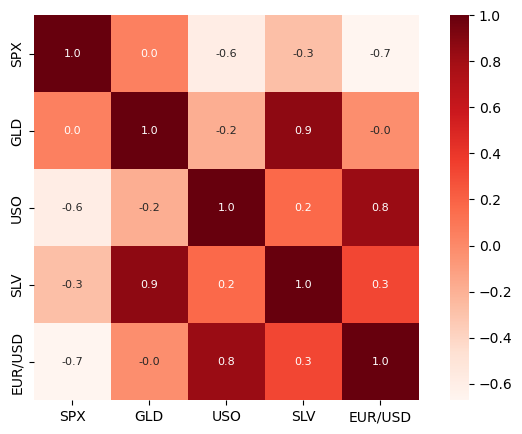

In [34]:
# Heatmap to understand the correlation

plt.figure(figsize=(8,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap="Reds")

In [35]:
# Correlation values for GLD

correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

**From the above Correlation Matrix, we can see that Gold['GLD'] is positively correlated to 'SLV'**

<Axes: xlabel='GLD', ylabel='Count'>

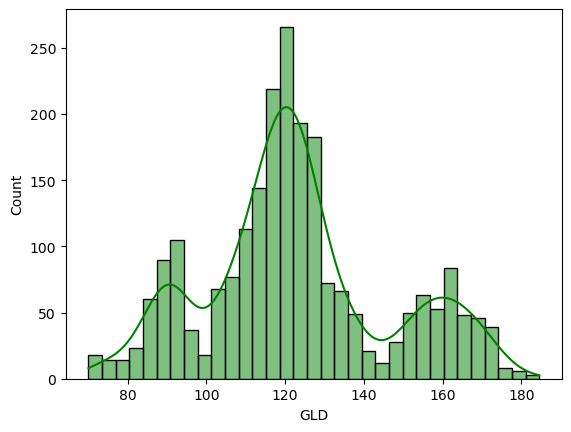

In [36]:
# checking the distribution of the GLD Price

sns.histplot(gold_df['GLD'], color='green', kde=True)

**Splitting the Features and Target**

In [43]:
X=gold_df.drop(['Date','GLD'],axis=1)
y=gold_df['GLD']

In [44]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [45]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

**Splitting the dataset into training and testing**

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Model Training - Random Forest Regressor**

In [48]:
regressor=RandomForestRegressor(n_estimators=100)

In [50]:
# Training

regressor.fit(X_train,y_train)

RandomForestRegressor()

**Evaluation**

In [51]:
# Evaluation

# Prediction on Test data

test_data_prediction=regressor.predict(X_test)

In [52]:
test_data_prediction

array([112.9678006 , 148.1540009 , 138.73099856, 112.67710172,
       113.95929962,  95.58099937, 111.81480014,  93.31099929,
       120.74980069, 127.11759959, 147.80879951, 120.44069905,
       119.36280019,  88.06410032,  96.0293005 ,  92.82159852,
       117.13280109,  89.02549897, 125.48170077, 114.93970012,
       118.90579946, 152.76040163, 122.47729791, 119.93379986,
       171.55849926, 108.53329851, 120.25930059,  87.17799869,
        87.71960027,  88.4670991 , 121.22760041, 154.32920101,
       149.33979832, 125.97280001, 126.57219992,  90.76479869,
       155.7357004 , 121.32600175, 106.79120068, 144.0906968 ,
        92.70699941, 127.6521008 , 117.36190084, 152.78890216,
       119.55300046,  91.37740162,  80.10789998, 120.10350195,
       131.69089983, 119.11969945, 127.22220088, 165.85270031,
       153.41340068,  92.6129989 , 148.94779974, 152.05629935,
       112.923701  , 112.82090063,  87.16309923, 127.74369874,
       125.23170037, 151.82920259, 114.45669975, 110.65

In [53]:
# R squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9874222003140982


**Compare the Actual Values and Predicted Values in a Plot**

In [57]:
y_test = list(y_test)

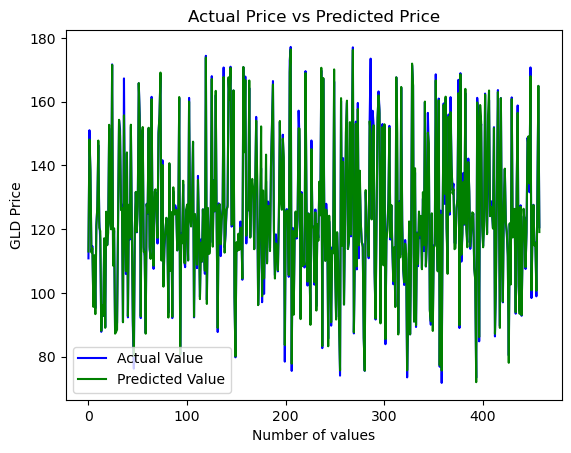

In [58]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

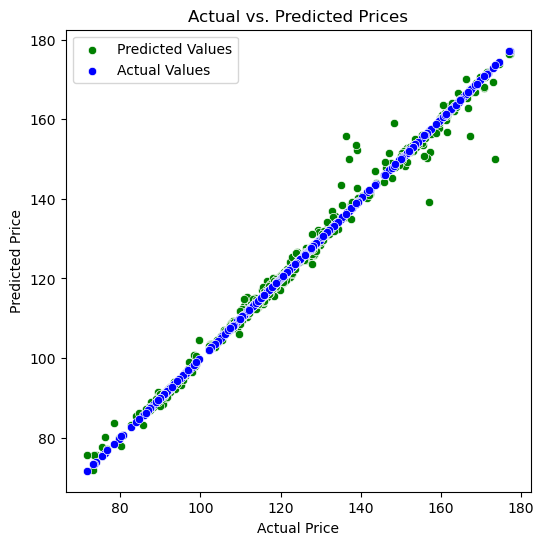

In [59]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=test_data_prediction, color='green', label='Predicted Values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Values')  # Ideally forms a diagonal line

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()
